### Bibliotecas úteis para Time Series com Python


*   Pandas
*   Scikit-learn
*   Numpy
*   Statsmodel



### Explorando os dados

In [1]:
import pandas as pd
series = pd.read_csv('datasets/champagne_sales.csv')

In [2]:
type(series)

pandas.core.frame.DataFrame

In [3]:
series.tail()

,Month,Sales
100,1972-05,4618
101,1972-06,5312
102,1972-07,4298
103,1972-08,1413
104,1972-09,5877




*   **header=0** : A informação de colunas está na primeira linha do arquivo
*   **parse_date=True** : Sinalizamos que o dataset contém coluna do tipo date.
*   **index_col=0** : Definimos nossa coluna indice que é a informação temporal.
*   **squeeze=True**: Sinalizamos que nos temos apenas um dado de coluna e que queremos transformar isso em uma série e não em um dataframe.



In [4]:
from pandas import read_csv
series = read_csv('datasets/champagne_sales.csv', header=0, index_col=0, parse_dates=True, squeeze=True)

In [6]:
type(series)

pandas.core.series.Series

**Explorando e resumindo os dados**

In [7]:
series.describe()

count      105.000000
mean      4761.152381
std       2553.502601
min       1413.000000
25%       3113.000000
50%       4217.000000
75%       5221.000000
max      13916.000000
Name: Sales, dtype: float64

**Visualizando dados**

Text(0.5, 0, 'Ano')

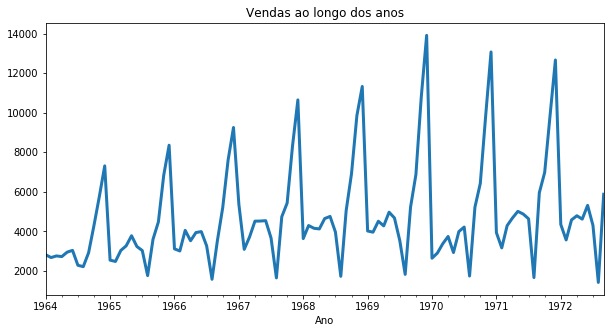

In [9]:
import matplotlib.pyplot as plt
series.plot(figsize=(10,5), 
            linewidth=3, 
            fontsize=10,
            title='Vendas ao longo dos anos')
plt.xlabel('Ano', fontsize=10)

**Vendas no ano de 1964 e 1965**

In [10]:
series['1964']

Month
1964-01-01    2815
1964-02-01    2672
1964-03-01    2755
1964-04-01    2721
1964-05-01    2946
1964-06-01    3036
1964-07-01    2282
1964-08-01    2212
1964-09-01    2922
1964-10-01    4301
1964-11-01    5764
1964-12-01    7312
Name: Sales, dtype: int64

In [11]:
series['1965-01']

Month
1965-01-01    2541
Name: Sales, dtype: int64

In [12]:
series.index

DatetimeIndex(['1964-01-01', '1964-02-01', '1964-03-01', '1964-04-01',
               '1964-05-01', '1964-06-01', '1964-07-01', '1964-08-01',
               '1964-09-01', '1964-10-01',
               ...
               '1971-12-01', '1972-01-01', '1972-02-01', '1972-03-01',
               '1972-04-01', '1972-05-01', '1972-06-01', '1972-07-01',
               '1972-08-01', '1972-09-01'],
              dtype='datetime64[ns]', name='Month', length=105, freq=None)

In [13]:
series.values

array([ 2815,  2672,  2755,  2721,  2946,  3036,  2282,  2212,  2922,
        4301,  5764,  7312,  2541,  2475,  3031,  3266,  3776,  3230,
        3028,  1759,  3595,  4474,  6838,  8357,  3113,  3006,  4047,
        3523,  3937,  3986,  3260,  1573,  3528,  5211,  7614,  9254,
        5375,  3088,  3718,  4514,  4520,  4539,  3663,  1643,  4739,
        5428,  8314, 10651,  3633,  4292,  4154,  4121,  4647,  4753,
        3965,  1723,  5048,  6922,  9858, 11331,  4016,  3957,  4510,
        4276,  4968,  4677,  3523,  1821,  5222,  6872, 10803, 13916,
        2639,  2899,  3370,  3740,  2927,  3986,  4217,  1738,  5221,
        6424,  9842, 13076,  3934,  3162,  4286,  4676,  5010,  4874,
        4633,  1659,  5951,  6981,  9851, 12670,  4348,  3564,  4577,
        4788,  4618,  5312,  4298,  1413,  5877], dtype=int64)

**Vendas por mês de cada ano**

In [14]:
from pandas import Grouper
from matplotlib import pyplot
from pandas import DataFrame

In [15]:
series

Month
1964-01-01    2815
1964-02-01    2672
1964-03-01    2755
1964-04-01    2721
1964-05-01    2946
              ... 
1972-05-01    4618
1972-06-01    5312
1972-07-01    4298
1972-08-01    1413
1972-09-01    5877
Name: Sales, Length: 105, dtype: int64

In [16]:
# Removendo os dados do ano 1972 por este ano ter menos dados
series.drop(series['1972'].index, inplace=True)

In [21]:
grupos = series.groupby(Grouper(freq='A'))
anos = DataFrame()
for nome, grupo in grupos:
  anos[nome.year] = grupo.values

In [22]:
anos

,1964,1965,1966,1967,1968,1969,1970,1971
0,2815,2541,3113,5375,3633,4016,2639,3934
1,2672,2475,3006,3088,4292,3957,2899,3162
2,2755,3031,4047,3718,4154,4510,3370,4286
3,2721,3266,3523,4514,4121,4276,3740,4676
4,2946,3776,3937,4520,4647,4968,2927,5010
5,3036,3230,3986,4539,4753,4677,3986,4874
6,2282,3028,3260,3663,3965,3523,4217,4633
7,2212,1759,1573,1643,1723,1821,1738,1659
8,2922,3595,3528,4739,5048,5222,5221,5951
9,4301,4474,5211,5428,6922,6872,6424,6981


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000022E9B1E7A08>,
      dtype=object)

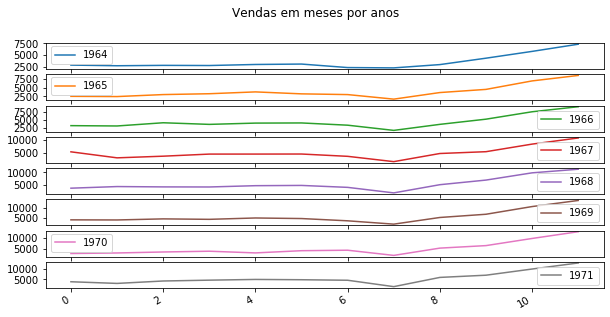

In [23]:
anos.plot(figsize=(10,5)
          ,subplots=True
          ,title='Vendas em meses por anos')

**Vendas por ano - Gráfico de pontos**

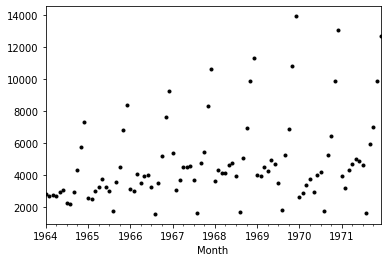

In [24]:
series.plot(style='k.')

**Visualizando a distribuição da série**

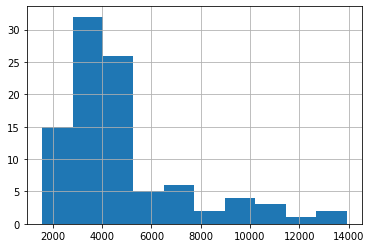

In [25]:
series.hist()

**Gráfico de Densidade**

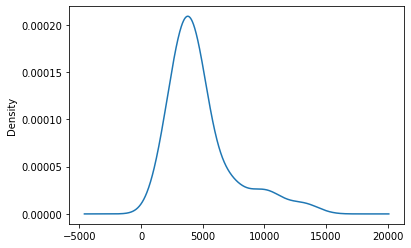

In [26]:
series.plot(kind='kde')

**Visualizando Outliers por anos**

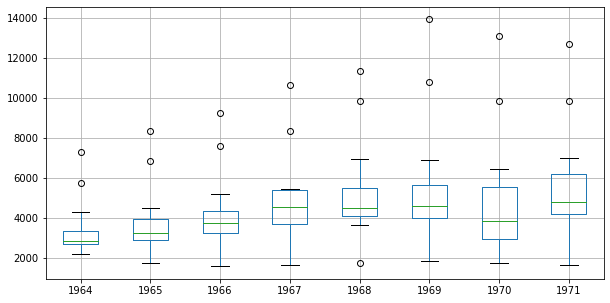

In [27]:
grupos = series.groupby(Grouper(freq='A'))
anos = DataFrame() 
for nome, grupo in grupos:
  anos[nome.year] = grupo.values
anos.boxplot(figsize=(10,5))

**Dispersão de valores e lags**


*   Visualizando a dispersão entre o valor t e t+n



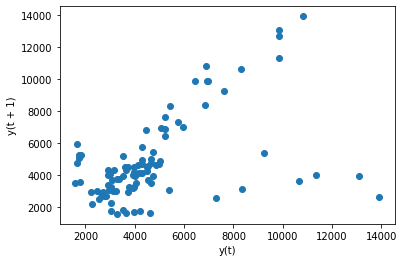

In [28]:
from pandas.plotting import lag_plot
lag_plot(series, lag=1)

**Autocorrelação**



1.   Mede a autocorrelação entre os lags.
2.   Ao execer as linhas pontilhadas mostra relevância estatística.



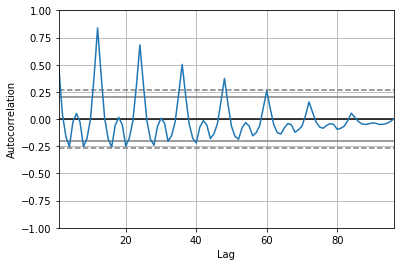

In [29]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(series)

**Autocorrelação com Statsmodels**



*   Calcula a correlação com lags.
*   Pode ser utilizado para configurações de modelos de previsão.
*   Exibe o intervalo de confiança de 95% por padrão.

In [30]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot

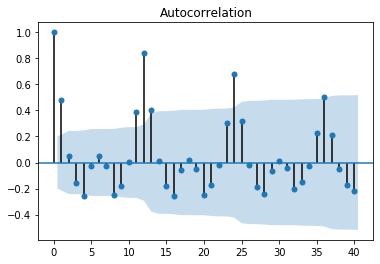

In [31]:
plot_acf(series, lags=40)
pyplot.show()

### Modelando Dados

Remodelar os dados envolve alterar a frequência das observacoes em dois tipos:

 **Upsampling**: Significa aumentar a frequencia das amostras, como por exemplo, minutos para segundos.

 **Downsampling**: Significa diminuir a frequencia das amostras, como por exemplo, dias para meses.

Existem duas principais razoes porque queremos remodelar nossos dados:

 **Problem Framing**: Remodelar os dados para trabalhar na mesma frequencia que as predicoes que iremos entregar.

 **Feature Engineering**: Remodelar os dados podem entregar insights e informações importantes para modelos de machine learning.

In [32]:
resample = series.resample('2M')

In [33]:
type(resample)

pandas.core.resample.DatetimeIndexResampler

In [34]:
print(resample)

DatetimeIndexResampler [freq=<2 * MonthEnds>, axis=0, closed=right, label=right, convention=start, base=0]


Cria uma variável para receber os dados do tipo série.

In [35]:
vendas_medias_dois_meses = resample.mean()

In [36]:
print(vendas_medias_dois_meses.head(15))

Month
1964-01-31    2815.0
1964-03-31    2713.5
1964-05-31    2833.5
1964-07-31    2659.0
1964-09-30    2567.0
1964-11-30    5032.5
1965-01-31    4926.5
1965-03-31    2753.0
1965-05-31    3521.0
1965-07-31    3129.0
1965-09-30    2677.0
1965-11-30    5656.0
1966-01-31    5735.0
1966-03-31    3526.5
1966-05-31    3730.0
Freq: 2M, Name: Sales, dtype: float64


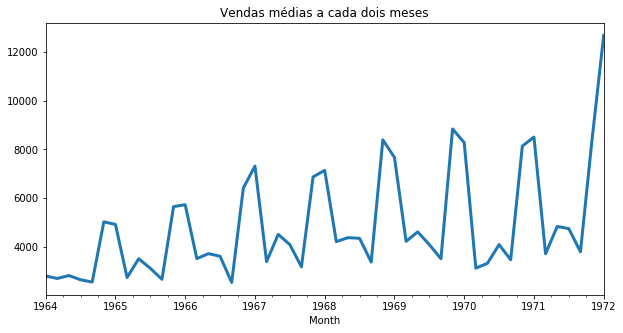

In [37]:
vendas_medias_dois_meses.plot(figsize=(10,5), linewidth=3, fontsize=10, title='Vendas médias a cada dois meses')
pyplot.show()

**Gráficos com Plotly**
-  Gráficos interativos
-  Visual mais profissional
-  Possibilidade de criaçao de um dasboard na nuvem

In [38]:
import plotly.offline as py
import plotly.graph_objs as go

data = [go.Scatter(x=vendas_medias_dois_meses.index,
                   y=vendas_medias_dois_meses.values)]

# Criando Layout:
configuracoes_layout = go.Layout(title='Vendas médias a cada dois meses',
                                 title_x=0.5,
                                 yaxis={'title':'Média de vendas'},
                                 xaxis={'title':'Periodo'})                   


# Objeto figura:
fig = go.Figure(data=data, layout=configuracoes_layout)

# plotando o grafico:
py.iplot(fig)

Trabalhando com Trimestres

In [39]:
upsampled = series.resample('Q')

In [40]:
vendas_trimestre = upsampled.mean()

In [41]:
print (vendas_trimestre)

Month
1964-03-31     2747.333333
1964-06-30     2901.000000
1964-09-30     2472.000000
1964-12-31     5792.333333
1965-03-31     2682.333333
1965-06-30     3424.000000
1965-09-30     2794.000000
1965-12-31     6556.333333
1966-03-31     3388.666667
1966-06-30     3815.333333
1966-09-30     2787.000000
1966-12-31     7359.666667
1967-03-31     4060.333333
1967-06-30     4524.333333
1967-09-30     3348.333333
1967-12-31     8131.000000
1968-03-31     4026.333333
1968-06-30     4507.000000
1968-09-30     3578.666667
1968-12-31     9370.333333
1969-03-31     4161.000000
1969-06-30     4640.333333
1969-09-30     3522.000000
1969-12-31    10530.333333
1970-03-31     2969.333333
1970-06-30     3551.000000
1970-09-30     3725.333333
1970-12-31     9780.666667
1971-03-31     3794.000000
1971-06-30     4853.333333
1971-09-30     4081.000000
1971-12-31     9834.000000
Freq: Q-DEC, Name: Sales, dtype: float64


Plota o gráfico de vendas por trimestre

In [42]:
import plotly.offline as py
import plotly.graph_objs as go

data = [go.Scatter(x=vendas_trimestre.index,
                   y=vendas_trimestre.values)]

# Criando Layout:
configuracoes_layout = go.Layout(title='Vendas médias por trimestre',
                                 title_x=0.5,
                                 yaxis={'title':'Média de vendas'},
                                 xaxis={'title':'Periodo'})                   


# Objeto figura:
fig = go.Figure(data=data, layout=configuracoes_layout)

# plotando o grafico:
py.iplot(fig)

Redimensionando os dados por ano

In [43]:
resample = series.resample('A')

In [44]:
vendas_por_ano = resample.sum() 
print(vendas_por_ano.head()) 

Month
1964-12-31    41738
1965-12-31    46370
1966-12-31    52052
1967-12-31    60192
1968-12-31    64447
Freq: A-DEC, Name: Sales, dtype: int64


Plota o gráfico da soma das vendas por ano

In [45]:
import plotly.offline as py
import plotly.graph_objs as go

data = [go.Scatter(x=vendas_por_ano.index,
                   y=vendas_por_ano.values,
                   marker = {'color':'green'})
                   ]

# Criando Layout:
configuracoes_layout = go.Layout(title='Vendas por Ano',
                                 title_x=0.5,
                                 yaxis={'title':'Média de vendas'},
                                 xaxis={'title':'Periodo'})                   


# Objeto figura:
fig = go.Figure(data=data, layout=configuracoes_layout)

# plotando o grafico:
py.iplot(fig)

Calculando a média de vendas por ano

In [46]:
resample = series.resample('A')

In [47]:
# alteramos o método sum() para mean()
vendas_medias_por_ano = resample.mean() 
print(vendas_medias_por_ano.head())

Month
1964-12-31    3478.166667
1965-12-31    3864.166667
1966-12-31    4337.666667
1967-12-31    5016.000000
1968-12-31    5370.583333
Freq: A-DEC, Name: Sales, dtype: float64


In [48]:
import plotly.offline as py
import plotly.graph_objs as go

data = [go.Scatter(x=vendas_medias_por_ano.index,
                   y=vendas_medias_por_ano.values,
                   marker = {'color':'green'})
                   ]

# Criando Layout:
configuracoes_layout = go.Layout(title='Média de Vendas por Ano',
                                 title_x=0.5,
                                 yaxis={'title':'Média de vendas'},
                                 xaxis={'title':'Periodo'})                   


# Objeto figura:
fig = go.Figure(data=data, layout=configuracoes_layout)

# plotando o grafico:
py.iplot(fig)

#### Engenharia de Features para Séries temporais


*   Objetivo da Engenharia de Features:
    - Fornecer uma **forte e simples** relação entre as variáveis de entrada e a variável alvo para o algoritmo de Machine Learning
    - Para Séries temporais não existe uma relação entre **variáveis de entrada e saída**, nós devemos inventar esses para modelar isso como um problema de aprendizado supervisionado a partir do zero.
    - Podemos nos basear na capacidade de modelos sofisticados para decifrar a complexidade do problema. Ou melhor, podemos facilitar o trabalho para esses modelos (e até usar modelos mais simples) se pudermos expor melhor o relacionamento inerente entre entradas e saídas nos dados.

*  É muito usado em séries temporais features que refletem:

  - *Sazonalidade.*
  - *Janelas de tempo (lag).*
  - *Janelas de tempo com estatísticas.*

*   Foco no negócio. Exemplos: 
    - *Trimestre, dia da semana, dia do mês, feriados, final de semana*
    - *vendas dos dias ou periodos anteriores ou a diferença desses valores*





In [49]:
# datetime tipo de dado
type(series.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [50]:
series

Month
1964-01-01     2815
1964-02-01     2672
1964-03-01     2755
1964-04-01     2721
1964-05-01     2946
              ...  
1971-08-01     1659
1971-09-01     5951
1971-10-01     6981
1971-11-01     9851
1971-12-01    12670
Name: Sales, Length: 96, dtype: int64

In [51]:
# retorna a hora do datetime
series.index.hour

Int64Index([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
            0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
            0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
            0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
            0, 0, 0, 0, 0, 0, 0, 0],
           dtype='int64', name='Month')

In [52]:
# retorna o trimestre
series.index.quarter

Int64Index([1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 1, 1, 1, 2, 2, 2, 3, 3, 3, 4,
            4, 4, 1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 1, 1, 1, 2, 2, 2, 3, 3,
            3, 4, 4, 4, 1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 1, 1, 1, 2, 2, 2,
            3, 3, 3, 4, 4, 4, 1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 1, 1, 1, 2,
            2, 2, 3, 3, 3, 4, 4, 4],
           dtype='int64', name='Month')

In [53]:
# retorna o dia da semana
series.index.dayofweek

Int64Index([2, 5, 6, 2, 4, 0, 2, 5, 1, 3, 6, 1, 4, 0, 0, 3, 5, 1, 3, 6, 2, 4,
            0, 2, 5, 1, 1, 4, 6, 2, 4, 0, 3, 5, 1, 3, 6, 2, 2, 5, 0, 3, 5, 1,
            4, 6, 2, 4, 0, 3, 4, 0, 2, 5, 0, 3, 6, 1, 4, 6, 2, 5, 5, 1, 3, 6,
            1, 4, 0, 2, 5, 0, 3, 6, 6, 2, 4, 0, 2, 5, 1, 3, 6, 1, 4, 0, 0, 3,
            5, 1, 3, 6, 2, 4, 0, 2],
           dtype='int64', name='Month')

In [54]:
# retorna o dia do ano
series.index.dayofyear

Int64Index([  1,  32,  61,  92, 122, 153, 183, 214, 245, 275, 306, 336,   1,
             32,  60,  91, 121, 152, 182, 213, 244, 274, 305, 335,   1,  32,
             60,  91, 121, 152, 182, 213, 244, 274, 305, 335,   1,  32,  60,
             91, 121, 152, 182, 213, 244, 274, 305, 335,   1,  32,  61,  92,
            122, 153, 183, 214, 245, 275, 306, 336,   1,  32,  60,  91, 121,
            152, 182, 213, 244, 274, 305, 335,   1,  32,  60,  91, 121, 152,
            182, 213, 244, 274, 305, 335,   1,  32,  60,  91, 121, 152, 182,
            213, 244, 274, 305, 335],
           dtype='int64', name='Month')

In [55]:
# retorna se é o último dia do ano
series.index.is_year_end

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False])

In [56]:
# retorna se é o primeiro dia do ano
series.index.is_year_start

array([ True, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False])

### Manipulando datas

In [57]:
import pandas as pd
faixa = pd.date_range(start='2019-01-01', end='2019-12-31', freq='B')

In [58]:
faixa

DatetimeIndex(['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04',
               '2019-01-07', '2019-01-08', '2019-01-09', '2019-01-10',
               '2019-01-11', '2019-01-14',
               ...
               '2019-12-18', '2019-12-19', '2019-12-20', '2019-12-23',
               '2019-12-24', '2019-12-25', '2019-12-26', '2019-12-27',
               '2019-12-30', '2019-12-31'],
              dtype='datetime64[ns]', length=261, freq='B')

In [59]:
pip install holidays

  Created wheel for holidays: filename=holidays-0.10.3-py3-none-any.whl size=115859 sha256=8bf7a5fe458dab34d7ac725bcdf7e4a12b66f8c3b57369f17dd793411aee61b3
  Stored in directory: c:\users\guilherme\appdata\local\pip\cache\wheels\d0\67\01\18308fa32fabcd0af569b9f52934b2118c9b30bcf7b4b378f8
  Created wheel for pymeeus: filename=PyMeeus-0.3.7-py3-none-any.whl size=702883 sha256=bb271aa315132060a20811a779dc499e6a00a834f0a638900d0e8887bf659838
  Stored in directory: c:\users\guilherme\appdata\local\pip\cache\wheels\80\32\5f\2a67880d4ce584b9cf99146f9945e46942dfb010a9382c6ff5
Successfully built holidays pymeeus
Note: you may need to restart the kernel to use updated packages.


In [60]:
import holidays
from datetime import date

In [61]:
feriados = holidays.Brazil()

In [62]:
# Natal
date(2019, 12, 25) in feriados

True

In [63]:
# Páscoa
date(2019, 4, 12) in feriados

False

In [64]:
# Tiradentes
date(2019, 4, 21) in feriados

True

In [65]:
# Dia do trabalho
date(2019, 5, 1) in feriados

True

In [66]:
dias_uteis = []
for dia in faixa.values:
  dia = pd.to_datetime(dia).date()
  print (dia in feriados)
  if dia in feriados:
    continue
  else:
    dias_uteis.append(dia)

True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
False
False
False
False
False
False
False
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

In [67]:
len(dias_uteis)

253

In [68]:
dias_uteis = pd.to_datetime(dias_uteis)

In [69]:
dias_uteis

DatetimeIndex(['2019-01-02', '2019-01-03', '2019-01-04', '2019-01-07',
               '2019-01-08', '2019-01-09', '2019-01-10', '2019-01-11',
               '2019-01-14', '2019-01-15',
               ...
               '2019-12-17', '2019-12-18', '2019-12-19', '2019-12-20',
               '2019-12-23', '2019-12-24', '2019-12-26', '2019-12-27',
               '2019-12-30', '2019-12-31'],
              dtype='datetime64[ns]', length=253, freq=None)

In [70]:
'2019-01-01' in dias_uteis

False

In [71]:
'2019-01-02' in dias_uteis

True

##### **Features de data**
- Dois recursos com os quais podemos começar são o mês e o dia de vendas.
- Podemos imaginar que algoritmos de aprendizado supervisionado podem usar essas entradas para ajudar a obter informações de sazonalidade, como por exemplo: *mês com mais vendas, ou dia do mês que mais vende*.

In [72]:
dataframe = DataFrame()

In [73]:
dataframe['mes'] = [series.index[i].month for i in range(len(series))]

In [74]:
dataframe['dia'] = [series.index[i].day for i in range(len(series))]

In [75]:
dataframe['vendas'] = [series[i] for i in range(len(series))]

In [76]:
dataframe

,mes,dia,vendas
0,1,1,2639
1,2,1,2672
2,3,1,2755
3,4,1,2721
4,5,1,2946
...,...,...,...
91,8,1,1659
92,9,1,5951
93,10,1,6981
94,11,1,9851


### Lag Features

- Slide Window (Janelas deslizantes)

In [77]:
series.head()

Month
1964-01-01    2815
1964-02-01    2672
1964-03-01    2755
1964-04-01    2721
1964-05-01    2946
Name: Sales, dtype: int64

In [78]:
# desloca o valor um lag a frente
series.shift()

Month
1964-01-01       NaN
1964-02-01    2815.0
1964-03-01    2672.0
1964-04-01    2755.0
1964-05-01    2721.0
               ...  
1971-08-01    4633.0
1971-09-01    1659.0
1971-10-01    5951.0
1971-11-01    6981.0
1971-12-01    9851.0
Name: Sales, Length: 96, dtype: float64

In [79]:
# desloca o valor um lag a frente
series.shift(1)

Month
1964-01-01       NaN
1964-02-01    2815.0
1964-03-01    2672.0
1964-04-01    2755.0
1964-05-01    2721.0
               ...  
1971-08-01    4633.0
1971-09-01    1659.0
1971-10-01    5951.0
1971-11-01    6981.0
1971-12-01    9851.0
Name: Sales, Length: 96, dtype: float64

In [80]:
# Cria um dataframe chamado temp
temp = DataFrame(series.values)

In [81]:
temp

,0
0,2815
1,2672
2,2755
3,2721
4,2946
...,...
91,1659
92,5951
93,6981
94,9851


In [82]:
# Desloca o valor um lag a frente
temp.shift(1)

,0
0,NaN
1,2815.0
2,2672.0
3,2755.0
4,2721.0
...,...
91,4633.0
92,1659.0
93,5951.0
94,6981.0


Concatenando o dataframe

In [83]:
from pandas import concat
dataframe = concat([temp.shift(1), temp], axis=1)

In [84]:
# cria as coluanas t e t+1
dataframe.columns = ['t', 't+1']

In [85]:
dataframe.head(5)

,t,t+1
0,NaN,2815
1,2815.0,2672
2,2672.0,2755
3,2755.0,2721
4,2721.0,2946


Expandindo os lags

In [86]:
temp = DataFrame(series.values)

In [87]:
# expandindo 2 lags a frente
temp.shift(2)

,0
0,NaN
1,NaN
2,2815.0
3,2672.0
4,2755.0
...,...
91,4874.0
92,4633.0
93,1659.0
94,5951.0


In [88]:
# expandindo 3 lags a frente
temp.shift(3)

,0
0,NaN
1,NaN
2,NaN
3,2815.0
4,2672.0
...,...
91,5010.0
92,4874.0
93,4633.0
94,1659.0


In [89]:
# concatena lags
dataframe = concat([temp.shift(3), temp.shift(2), temp.shift(1), temp], axis=1)

In [90]:
# cria colunas
dataframe.columns = ['t-2', 't-1', 't', 't+1']

In [91]:
# imprime o dataframe gerado
print(dataframe.head(10))

t-2     t-1       t   t+1
0     NaN     NaN     NaN  2815
1     NaN     NaN  2815.0  2672
2     NaN  2815.0  2672.0  2755
3  2815.0  2672.0  2755.0  2721
4  2672.0  2755.0  2721.0  2946
5  2755.0  2721.0  2946.0  3036
6  2721.0  2946.0  3036.0  2282
7  2946.0  3036.0  2282.0  2212
8  3036.0  2282.0  2212.0  2922
9  2282.0  2212.0  2922.0  4301


In [92]:
# dados originais..
temp.head(10)

,0
0,2815
1,2672
2,2755
3,2721
4,2946
5,3036
6,2282
7,2212
8,2922
9,4301


### Trabalhando com o método Rolling 

In [93]:
# cria um dataframe a partir dos dados originais
temp = pd.DataFrame(series.values)

In [94]:
# a variável dados_deslocados recebe os dados de um lag a frente
dados_deslocados = temp.shift(1)

In [95]:
# imprime a variável dados_deslocados
dados_deslocados

,0
0,NaN
1,2815.0
2,2672.0
3,2755.0
4,2721.0
...,...
91,4633.0
92,1659.0
93,5951.0
94,6981.0


In [96]:
# cria uma variável com rolling
window = dados_deslocados.rolling(window=2)

In [97]:
# imprime a variável window
window

Rolling [window=2,center=False,axis=0]

In [98]:
# cria a variável media
media = window.mean()

In [99]:
# imprime a variável media
media

,0
0,NaN
1,NaN
2,2743.5
3,2713.5
4,2738.0
...,...
91,4753.5
92,3146.0
93,3805.0
94,6466.0


In [100]:
# cria um dataframe concatendo a media com os dados reais
dataframe = concat([media, temp], axis=1)

In [101]:
# cria as colunas
dataframe.columns = ['mean(t-1,t)', 't+1']

In [102]:
# imprime o dataframe gerado
print(dataframe.head(10))

mean(t-1,t)   t+1
0          NaN  2815
1          NaN  2672
2       2743.5  2755
3       2713.5  2721
4       2738.0  2946
5       2833.5  3036
6       2991.0  2282
7       2659.0  2212
8       2247.0  2922
9       2567.0  4301


Entendendo os dados gerados..

- `Os primeiros NaN values foram criados pelo deslocamento dos dados.`

- `O segundo valor não pode ser usado apenas para calcular a média.`

- `A terceira linha mostra o valor esperado de 2743.5 (média de 2815 e 2672) e o valor de t+1`


Comparando com a série original...

In [103]:
series.head()

Month
1964-01-01    2815
1964-02-01    2672
1964-03-01    2755
1964-04-01    2721
1964-05-01    2946
Name: Sales, dtype: int64

Adicionando estatística nos dados

In [104]:
# define a variável tamanho
tamanho = 3

In [105]:
# variável dados_deslocados recebe tamanho - 1
dados_deslocados = temp.shift(tamanho)

In [106]:
# imprime a variável dados_deslocados
dados_deslocados

,0
0,NaN
1,NaN
2,NaN
3,2815.0
4,2672.0
...,...
91,5010.0
92,4874.0
93,4633.0
94,1659.0


In [107]:
# cria a variável janela que recebe o rolling do tamanho especificado
janela = dados_deslocados.rolling(window=tamanho)

In [108]:
janela

Rolling [window=3,center=False,axis=0]

In [109]:
# cria o dataframe com as estatísticas da janela
dataframe = concat([window.min(), window.mean(), window.max(), temp], axis=1)

In [110]:
# imprime o dataframe gerado
dataframe

,0,0,0,0
0,NaN,NaN,NaN,2815
1,NaN,NaN,NaN,2672
2,2672.0,2743.5,2815.0,2755
3,2672.0,2713.5,2755.0,2721
4,2721.0,2738.0,2755.0,2946
...,...,...,...,...
91,4633.0,4753.5,4874.0,1659
92,1659.0,3146.0,4633.0,5951
93,1659.0,3805.0,5951.0,6981
94,5951.0,6466.0,6981.0,9851


In [111]:
# cria as colunas do dataframe
dataframe.columns = ['min', 'mean', 'max', 't+1']

In [112]:
# imprime o dataframe
dataframe.head(10)

,min,mean,max,t+1
0,NaN,NaN,NaN,2815
1,NaN,NaN,NaN,2672
2,2672.0,2743.5,2815.0,2755
3,2672.0,2713.5,2755.0,2721
4,2721.0,2738.0,2755.0,2946
5,2721.0,2833.5,2946.0,3036
6,2946.0,2991.0,3036.0,2282
7,2282.0,2659.0,3036.0,2212
8,2212.0,2247.0,2282.0,2922
9,2212.0,2567.0,2922.0,4301


### Médias Móveis (Average Moving Smoothing)



*   Valor médio de valores em uma sequência de tempo.
*   Técnica de suavização que remove variações finas nos dados.
*   Objetivo é remover ruídos e fazer previsões.
*   Pode ser usado para Feature Engineering.



In [113]:
# importa as bibliotecas que serão usadas
import pandas as pd
from pandas import read_csv
from pandas import concat
from matplotlib import pyplot

In [114]:
# ler a base de dados usada.
series = read_csv('datasets/champagne_sales.csv', header=0, index_col=0, parse_dates=True, squeeze=True)

In [157]:
# cria um objeto rolling de janela igual a 3
rolling = series.rolling(window=3)

In [158]:
rolling

Rolling [window=3,center=False,axis=0]

In [159]:
# calcula a média da janela
rolling_mean = rolling.mean()

In [160]:
# imprime o objeto rolling_mean
print(rolling_mean.head(10))

Month
1964-01-01            NaN
1964-02-01            NaN
1964-03-01    2747.333333
1964-04-01    2716.000000
1964-05-01    2807.333333
1964-06-01    2901.000000
1964-07-01    2754.666667
1964-08-01    2510.000000
1964-09-01    2472.000000
1964-10-01    3145.000000
Name: Sales, dtype: float64


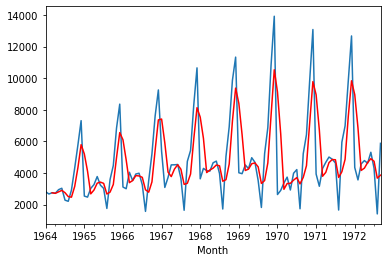

In [161]:
# plot os dados originais e os dados da média móvel 
series.plot()
rolling_mean.plot(color='red')
pyplot.show()

#### Média Móvel - Engenharia de Features



In [120]:
from pandas import DataFrame

In [121]:
# cria um dataframe df
df = DataFrame(series.values)

In [122]:
# imprime as 5 linhas do dataframe
df.head()

,0
0,2815
1,2672
2,2755
3,2721
4,2946


In [123]:
# cria uma constante
tamanho = 3

In [124]:
# cria uma variável com os dados deslocados +1
lag1 = df.shift(1)

In [125]:
# cria uma variável com os dados deslocados +3
lag3 = df.shift(tamanho)

In [126]:
# cria uma janela usando o rolling
window = lag3.rolling(window=tamanho)

In [127]:
# imprime a janela
window

Rolling [window=3,center=False,axis=0]

In [128]:
# cria a variável media que é a média da jenela.
media = window.mean()

In [129]:
# imprime a variável media
media

,0
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
100,6860.666667
101,4163.000000
102,4309.666667
103,4661.000000


In [130]:
# imprime o dataframe
df.head()

,0
0,2815
1,2672
2,2755
3,2721
4,2946


In [131]:
# concatena os dados
dataframe = concat([media, lag1, df], axis=1)

In [132]:
# cria as colunas
dataframe.columns = ['media', 't', 't+1']

In [133]:
lag3

,0
0,NaN
1,NaN
2,NaN
3,2815.0
4,2672.0
...,...
100,3564.0
101,4577.0
102,4788.0
103,4618.0


In [134]:
# imprime o dataframe
dataframe.head(10)

,media,t,t+1
0,NaN,NaN,2815
1,NaN,2815.0,2672
2,NaN,2672.0,2755
3,NaN,2755.0,2721
4,NaN,2721.0,2946
5,2747.333333,2946.0,3036
6,2716.000000,3036.0,2282
7,2807.333333,2282.0,2212
8,2901.000000,2212.0,2922
9,2754.666667,2922.0,4301


#### Previsões com Média Móvel



1.   Solução simples (walk-forward)
2.   Interessante para se criar baselines.
3.   Pode se usar Janelas Deslizantes para trabalhar com dados quentes.



In [135]:
from math import sqrt
from pandas import read_csv
from numpy import mean
from sklearn.metrics import mean_squared_error

In [136]:
series

Month
1964-01-01    2815
1964-02-01    2672
1964-03-01    2755
1964-04-01    2721
1964-05-01    2946
              ... 
1972-05-01    4618
1972-06-01    5312
1972-07-01    4298
1972-08-01    1413
1972-09-01    5877
Name: Sales, Length: 105, dtype: int64

In [137]:
# Define uma janela de 3 elementos
window = 3

In [138]:
# Obtem os 3 primeiros valores da serie
history = [series.values[i] for i in range(window)]

In [139]:
# imprime a variável history
history

[2815, 2672, 2755]

In [140]:
# Obtem todos os valores após os tres primeiros.
# range(3, tamanho_da_serie)

test = [series.values[i] for i in range(window, len(series.values))]

In [141]:
# imprime a variável test
# 10 primeiros valores da série após o history
test

[2721,
 2946,
 3036,
 2282,
 2212,
 2922,
 4301,
 5764,
 7312,
 2541,
 2475,
 3031,
 3266,
 3776,
 3230,
 3028,
 1759,
 3595,
 4474,
 6838,
 8357,
 3113,
 3006,
 4047,
 3523,
 3937,
 3986,
 3260,
 1573,
 3528,
 5211,
 7614,
 9254,
 5375,
 3088,
 3718,
 4514,
 4520,
 4539,
 3663,
 1643,
 4739,
 5428,
 8314,
 10651,
 3633,
 4292,
 4154,
 4121,
 4647,
 4753,
 3965,
 1723,
 5048,
 6922,
 9858,
 11331,
 4016,
 3957,
 4510,
 4276,
 4968,
 4677,
 3523,
 1821,
 5222,
 6872,
 10803,
 13916,
 2639,
 2899,
 3370,
 3740,
 2927,
 3986,
 4217,
 1738,
 5221,
 6424,
 9842,
 13076,
 3934,
 3162,
 4286,
 4676,
 5010,
 4874,
 4633,
 1659,
 5951,
 6981,
 9851,
 12670,
 4348,
 3564,
 4577,
 4788,
 4618,
 5312,
 4298,
 1413,
 5877]

In [142]:
# serie original
series.values

array([ 2815,  2672,  2755,  2721,  2946,  3036,  2282,  2212,  2922,
        4301,  5764,  7312,  2541,  2475,  3031,  3266,  3776,  3230,
        3028,  1759,  3595,  4474,  6838,  8357,  3113,  3006,  4047,
        3523,  3937,  3986,  3260,  1573,  3528,  5211,  7614,  9254,
        5375,  3088,  3718,  4514,  4520,  4539,  3663,  1643,  4739,
        5428,  8314, 10651,  3633,  4292,  4154,  4121,  4647,  4753,
        3965,  1723,  5048,  6922,  9858, 11331,  4016,  3957,  4510,
        4276,  4968,  4677,  3523,  1821,  5222,  6872, 10803, 13916,
        2639,  2899,  3370,  3740,  2927,  3986,  4217,  1738,  5221,
        6424,  9842, 13076,  3934,  3162,  4286,  4676,  5010,  4874,
        4633,  1659,  5951,  6981,  9851, 12670,  4348,  3564,  4577,
        4788,  4618,  5312,  4298,  1413,  5877], dtype=int64)

**Previsão com Média Móvel - Janela deslizante**

In [143]:
# Define uma variavel chamada X que é a copia da serie de dados
X = series.values

# Define a variável window = 3 que será a janela de 3 valroes
window = 3

# Obtem os 3 primeiros valores da serie
history = [X[i] for i in range(window)]

# Obtem todos os valores após os tres primeiros.
test = [X[i] for i in range(window, len(X))]

# cria lista de predições
predicoes = []

# Intera sobre os dados de teste...

for t in range(len(test)):
  # define a variavel length com o tamanho da variável history
  length = len(history)
  
  # define a variável valor_predito com a média dos 3 valores correntes..                                                           
  valor_predito = mean([history[i] for i in range(length - window, length)])        
  
  # define a variável valor_real com o valor atual do teste..
  valor_real = test[t]                                                              
  
  # alimenta a lista de predicoes
  predicoes.append(valor_predito)                                                  
  
  # atualiza a lista history com os valores correntes..
  history.append(valor_real)                                                        
  
  # imprime o valor predito e o real...
  print('Valor predito=%f, Valor real=%f' % (valor_predito, valor_real))                 

Valor predito=2747.333333, Valor real=2721.000000
Valor predito=2716.000000, Valor real=2946.000000
Valor predito=2807.333333, Valor real=3036.000000
Valor predito=2901.000000, Valor real=2282.000000
Valor predito=2754.666667, Valor real=2212.000000
Valor predito=2510.000000, Valor real=2922.000000
Valor predito=2472.000000, Valor real=4301.000000
Valor predito=3145.000000, Valor real=5764.000000
Valor predito=4329.000000, Valor real=7312.000000
Valor predito=5792.333333, Valor real=2541.000000
Valor predito=5205.666667, Valor real=2475.000000
Valor predito=4109.333333, Valor real=3031.000000
Valor predito=2682.333333, Valor real=3266.000000
Valor predito=2924.000000, Valor real=3776.000000
Valor predito=3357.666667, Valor real=3230.000000
Valor predito=3424.000000, Valor real=3028.000000
Valor predito=3344.666667, Valor real=1759.000000
Valor predito=2672.333333, Valor real=3595.000000
Valor predito=2794.000000, Valor real=4474.000000
Valor predito=3276.000000, Valor real=6838.000000


In [144]:
# calcula a métrica de rmse
rmse = sqrt(mean_squared_error(test, predicoes))                               

In [145]:
# imprime o valor de rmse
print('Métrica RMSE: %.3f' % rmse)

Métrica RMSE: 2960.299


In [ ]:
# plot o valor real (test) e as predições 
pyplot.plot(test) 
pyplot.plot(predicoes, color='red')
pyplot.show()

### Decompondo uma série temporal

- **Modelo aditivo**

                      y(t) = Level + Trend + Seasonality + Noise

  - Os componentes se somam.
  - A amplitude da sazonalidade se mantém com um aumento da tendência.



- **Modelo multiplicativo**

                      y(t) = Level × Trend × Seasonality × Noise
                
  - Os componentes se multiplicam.
  - A amplitude da sazonalidade também aumenta com a tendência

Monta o drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Importa a biblioteca Statsmodel

In [ ]:
import pandas.util.testing as tm
from statsmodels.tsa.seasonal import seasonal_decompose

Ler a base de dados

In [ ]:
import pandas as pd
series = pd.read_csv('/content/drive/My Drive/Curso Séries Temporais/champagne_sales.csv', header=0, index_col=0, parse_dates=True, squeeze=True)

Plotando a distribuição da série

In [ ]:
from pandas import read_csv 
from matplotlib import pyplot

# plota um histogram

pyplot.figure(1)
pyplot.subplot(211)
series.hist()

Visualizando os dados

In [ ]:
series.plot()

Criando um modelo aditivo

In [ ]:
resultado = seasonal_decompose(series,  model='additive')

In [ ]:
import matplotlib.pyplot as plt
resultado.plot()
pyplot.show()

Criando um modelo multiplicativo

In [ ]:
resultado = seasonal_decompose(series,  model='multiplicative')

In [ ]:
import matplotlib.pyplot as plt
resultado.plot()
pyplot.show()

### Removendo tendência e sazonalidade da série temporal

Considerações Gerais:

-      Conveniência: *Remover tendência e sazonalidade de várias séries para treinar um único modelo*.

-      Clareza na informação: *Remover as informações sazonais podem clarear os sinais nos dados. Exemplo: Os preços das ações da APPLE sobem a 5 anos. O modelo levar isso em consideração pode atrapalhar prever se o dia de amanhã será de alta ou não alta*

**Tipos de Sazonalidades, exemplo:**

- Hora do dia.
- Diário.
- Dia da Semana.
- Semanal.
- Mensal.
- Anual.

**Métodos Statísticos**
  - Remove informação sistematica que pode distorcer a relação entre as variáveis de entrada e alvo.
  - Adiciona informação sistemática para melhorar a relação entre as variáveis de entrada e variáveis de saída.
  - Tende a melhorar modelos devido a incapacidade de alguns métodos.

**Machine Learning**
  - Remove informação sistematica que pode distorcer a relação entre as variáveis de entrada e alvo.
  - Adiciona informação sistemática para melhorar a relação entre as variáveis de entrada e variáveis de saída.
  - Nem sempre melhora os modelos de Machine Learning.

Tendência obvia

In [ ]:
series.plot()

Decompondo a série

In [ ]:
import pandas.util.testing as tm
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
resultado = seasonal_decompose(series,  model='multiplicative')

In [ ]:
import matplotlib.pyplot as plt
resultado.plot()
plt.show()

#### Diferenciação

- *Diferenciação de primeiro nível*
- *Converte níveis para alterações*



                  value(t) = observation(t) − observation(t − 1)

In [ ]:
# cria uma lista vazia
diff = list()

In [ ]:
# para cada valor da série, subtrair pelo valor anterior
for i in range(1, len(series.values)):
  valor = series.values[i] - series.values[i - 1]
  diff.append(valor)

In [ ]:
# imprime os 10 primeiros valores da série
diff[:10]

In [ ]:
# plota a série após a diferenciação
from matplotlib import pyplot
pyplot.plot(diff)

In [ ]:
series.plot()

Removendo Sazonalidade

In [ ]:
import pandas as pd
series = pd.read_csv('/content/drive/My Drive/Curso Séries Temporais/Materiais de Apoio/champagne_sales.csv', header=0, index_col=0, parse_dates=True, squeeze=True)

In [ ]:
series.head()

In [ ]:
# cria uma lista chamada diff
diff = list()

# define o número de mês que iremos usar
mes = 1

# intera sobre os valores da série
for i in range(mes, len(series.values)):
  
  # a variavel valor recebe o valor da série atual - o valor da série do mês anterior..
  valor = series.values[i] - series.values[i - mes]
  
  # alimenta a lista diff
  diff.append(valor)  

In [ ]:
from matplotlib import pyplot
pyplot.plot(diff)
pyplot.show()

### Estacionariedade em Séries temporais

- Séries temporais são diferentes de problemas tradicionais de classificação e regressão. A estrutura temporal adiciona uma ordem as observações.
- Essa ordem imposta significa que suposições importantes sobre a consistência dessas observações precisam ser tratadas especialmente.
- Na terminologia de séries temporais, as séries cuja resumos estatísticos são constantes chamamos de séries estacionárias.

**Verifica estacionariedade de uma série:**

*   Olhe os gráficos.
*   Estatítica descritiva.
*   Testes Estatísticos.



In [ ]:
import pandas as pd
series = pd.read_csv('/content/drive/My Drive/Curso Séries Temporais/Materiais de Apoio/champagne_sales.csv', header=0, index_col=0, parse_dates=True, squeeze=True)

Analisando o histograma da série

In [ ]:
from matplotlib import pyplot
series.hist()
pyplot.show()

In [ ]:
# separa os dados em duas partes
split = int(len(series.values) / 2)

In [ ]:
print (len(series.values))
print (split)

In [ ]:
# Divide os dados em duas partes e coloca nas variáveis x1 e x2
X1 = series.values[0:split]
X2 = series.values[split:]

In [ ]:
# calcula as médias
mean1 =  X1.mean()
mean2 =  X2.mean()

In [ ]:
#mean1
mean2

In [ ]:
# calcula a variância entre as partes
var1, var2 = X1.var(), X2.var()

In [ ]:
# imprime média e variância entre as partes
print('media1= %f, \nmedia2= %f' % (mean1, mean2))

In [ ]:
print('variancia1= %f, \nvariancia2= %f' % (var1, var2))

Teste Estatístico - Augmented Dickey-Fuller test

- Hipotese Nula (H0): *Falha para rejeitar, sugere que a série não é estacionária. Esta tem estrutura dependente de tempo.*

- Hipotese Alternativa (H1): *A hipotese nula foi rejeitada, sugere que a série temporal é estacionária. Esta não tem estrutura dependente de tempo.*

* **p-value > 0.05**: Falha para rejeitar a hipotese nula (h0) a série é não estacionária.

* **p-value ≤ 0.05**: Rejeita a hipotese nula (H0), a série é estacionária.

In [ ]:
import pandas.util.testing as tm
from statsmodels.tsa.stattools import adfuller

In [ ]:
resultado = adfuller(series.values)

In [ ]:
print('ADF teste: %f' % resultado[0])

In [ ]:
print('p-value: %f' % resultado[1])

In [ ]:
print('Critical Values:')
for key, value in resultado[4].items():
  print('\t%s: %.3f' % (key, value))

### Transformando a Série Temporal em Estacionária:

Aplicando Log na série

In [ ]:
from numpy import log

In [ ]:
serie_transformada = log(series.values)

In [ ]:
from matplotlib import pyplot
pyplot.hist(serie_transformada)
pyplot.show()

In [ ]:
resultado = adfuller(serie_transformada)
print('\nADF teste: %f' % resultado[0])
print('\np-value: %f' % resultado[1])
print('\nCritical Values:')
for key, value in resultado[4].items():
  print('\t%s: %.3f' % (key, value))

Aplicando a diferenciação

In [ ]:
# cria uma lista chamada diff
diff = list()
mes = 1
for i in range(mes, len(series.values)):
  # a variavel valor recebe o valor da série atual - o valor da série do mês anterior..
  valor = series.values[i] - series.values[i - mes]
  # alimenta a lista diff
  diff.append(valor)

Aplicando o Teste AdFuller

In [ ]:
import pandas.util.testing as tm
from statsmodels.tsa.stattools import adfuller

resultado = adfuller(diff)
print('\nADF teste: %f' % resultado[0])
print('\np-value: %f' % resultado[1])
print('\nCritical Values:')
for key, value in resultado[4].items():
  print('\t%s: %.3f' % (key, value))

### Modelos de Previsão usando Autoregressão

#### **`ARIMA`**

Método estatístico que utiliza um modelo linear que utiliza autoregressão e modelo de média móvel para previsão de séries temporais. Um modelo linear é construído incluindo um número especificado de termos e o dado é preparado por um nível de diferenciação afim de tornar este estacionário.

Podemos usar um valor 0 para desligar um parâmetro, dessa forma, aquela função em questão não será feita, por exemplo, se no parâmetro d definirmos 0 não será realizada uma diferenciação nos dados. Neste exemplo teríamos um modelo **ARMA**.

---

*   **AR**: *Autoregression* : Um modelo que usa a relação dependende entre uma observação e alguns lags.

*   **I**: *Integrated*  : Uso de diferenciação nas observações brutas, exemplo: subtração do valor de uma observação com sua observação anterior. O objetivo é transformar a série temporal em estacionária.

*  **MA**: *Moving Average* : Um modelo que usa a dependência entre a observação e o erro residual a partir de um modelo de média móvel aplicado a lags.

          residual error = expected − predicted
    
- Isso é diferente de **Moving Average Smoothing.**
- Erros residuais contém estruturas temporais que podem ser modeladas.
- Existem sinais complexos nos erros residuais.
- Um modelo que prever o erro residual pode ser usado para ajustar os próximos erros e melhorar um modelo que aprende com o histórico.




---

O modelo arima contém alguns parâmetros


```
# ARIMA(p,d,q)
```
*   **p:** O número de lags que foram devem ser incluídos no modelo.
*   **d:** O número de vezes que as observações serão diferenciadas.
*   **q:** O tamanho de uma janela de média móvel. Também chamada de ordem de média móvel.

In [ ]:
import pandas as pd
series = pd.read_csv('/content/drive/My Drive/Curso Séries Temporais/Materiais de Apoio/champagne_sales.csv', header=0, index_col=0, parse_dates=True, squeeze=True)

In [ ]:
from pandas.plotting import autocorrelation_plot
from matplotlib import pyplot

In [ ]:
# autocorrelation plot 
autocorrelation_plot(series)
pyplot.show()

In [ ]:
import pandas.util.testing as tm
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot

In [ ]:
plot_acf(series, lags=40)
pyplot.show()

Modelo ARIMA para análise de dados

In [ ]:
# fit model
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot

In [ ]:
model = ARIMA(series, order=(5,1,0))

In [ ]:
model_fit = model.fit()

In [ ]:
# summary of fit model 
print(model_fit.summary())

In [ ]:
# line plot of residuals
from pandas import DataFrame
residuals = DataFrame(model_fit.resid)

In [ ]:
residuals.plot()
pyplot.show()

In [ ]:
# density plot of residuals 
residuals.plot(kind='kde')
pyplot.show()

In [ ]:
# summary stats of residuals
print(residuals.describe())

### Projeto: Prevendo dados futuros.

In [ ]:
import pandas as pd
series = pd.read_csv('/content/drive/My Drive/Curso Séries Temporais/Materiais de Apoio/champagne_sales.csv', header=0, index_col=0, parse_dates=True, squeeze=True)

In [ ]:
from IPython.display import Image
Image('/content/drive/My Drive/Curso Séries Temporais/Materiais de Apoio/time_series_project.png')

**Boas Práticas**

*   Comece com um baseline simples para ter referência.
*   Faça uma análise de dados antes de iniciar previsão de valores.
*   Teste Modelos difentes e avalie:
  - Complexidade.
  - Intepretabilidade.
  - Custo computacional.
*   Faça teste A/B antes de colocar em produção sua solução.

**Separando os dados para treino, teste e validação**

Vamos separar dois arquivos fisicos:

  - **dataset.csv**: Dados de 1964 a setembro de 1971.

  - **validation.csv**: Dados de Outubro de 1971 a Outubro de 1972 (1 ano de vendas).

In [ ]:
# pega a quantidade de linhas e subtrai por 12
split_point = len(series) - 12

In [ ]:
# define que a variável dataset vai conter linhas até o split_point
dataset = series[0:split_point]

In [ ]:
# define que a variável validation terá os dados do split_point em diante
validation = series[split_point:]

In [ ]:
# imprime o tamanho dos conjuntos
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))

In [ ]:
# escreve para o disco
dataset.to_csv('dataset.csv')

In [ ]:
# escreve para o disco.
validation.to_csv('validation.csv')

**Analise de Dados**

In [ ]:
import pandas as pd
series = pd.read_csv('/content/dataset.csv', header=0, index_col=0, parse_dates=True, squeeze=True)

In [ ]:
series.describe()

*   A média é de 4,641 isso significa em o nível da nossa série é de 4,641 vendas em média.
*   O desvio padrão é relativamente alto 2,486 vendas variando a partir da média.
*   Os quartis juntamente com o desvio padrão nos mostra que os dados estão espalhados da média.

In [ ]:
# Dados na linha do tempo
series.plot()

   - Aparentemente existe um aumento de tendência de vendas ao longo dos anos.
   - Aparentemente existe uma sazonalidade nas vendas por anos.
   - Aparentemente a amplitude da sazonalidade aumenta conforme a tendência, isso pode sugerir um relacionamento multiplicativo.
   - Aparentemente não existe qualquer outlier.
   - Como vimos que há uma tendência e uma sazonalidade (obvias) isso nos dá forte indício que estamos trabalhando com uma série não estacionária.

**Visualizando a Sazonalidade**

Podemos confirmar nossa suposição de que a sazonalidae é anual. No código abaixo plotamos os dados agrupados por ano para visualizar as vendas de cada ano. 


In [ ]:
from pandas import DataFrame
from pandas import Grouper

In [ ]:
grupos = series['1964':'1970'].groupby(Grouper(freq='A'))
anos = DataFrame()
for nome, grupo in grupos:
  anos[nome.year] = grupo.values

anos.plot(figsize=(10,5)
          ,subplots=True
          ,title='Vendas em meses por anos')

- Podemos ver claramente que as vendas caiem em agosto e aumentam do final do mês seguinte até o final do ano. Isso se repete a cada ano.

**Plotando a distribuição da Série**
-  A distribuição não é uma normal.
-  A forma tem uma longa cauda a direita. Isso pode sugerir algum tipo de transformação.

In [ ]:
# Distribuição da Série
from matplotlib import pyplot
pyplot.figure(1)
pyplot.subplot(211)
series.hist()
pyplot.subplot(212)
series.plot(kind='kde')
pyplot.show()

**Visualizando Autocorrelação**

In [ ]:
import pandas.util.testing as tm
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot

In [ ]:
plot_acf(series, lags=40)
pyplot.show()

**Checando Estacionariedade**

In [ ]:
import pandas.util.testing as tm
from statsmodels.tsa.stattools import adfuller

resultado = adfuller(series.values)
print('\nADF teste: %f' % resultado[0])
print('\np-value: %f' % resultado[1])
print('\nCritical Values:')
for key, value in resultado[4].items():
  print('\t%s: %.3f' % (key, value))

**Especificando um Baseline**
- Um baseline é um valor simples que temos para começar o nosso projeto.
- Serve de referência para saber como nosso modelo está se saindo.
- Exemplo: Valor de previsão é o valor anterior, no nosso caso, o valor do mês anterior.

In [ ]:
import pandas as pd
series = pd.read_csv('/content/drive/My Drive/Curso Séries Temporais/Materiais de Apoio/champagne_sales.csv', header=0, index_col=0, parse_dates=True, squeeze=True)

In [ ]:
# atribui os dados a variável X 
X = series.values

In [ ]:
# define o tamanho do conjunto de treino (50% dos dados para treino e teste)
train_size = int(len(X) * 0.50)

In [ ]:
# cria os conjuntos de treino e teste
train = X[0:train_size]
test = X[train_size:]

In [ ]:
# obtem todos od dados do treino 
history = [x for x in train]

In [ ]:
# imprime os 10 primeiros valores da variável history
history[:10]

In [ ]:
# imprime o último valor da variável history
history[-1]

In [ ]:
# cria lista de previsões
predictions = list()

In [ ]:
# aplicando o modelo naive
for i in range(len(test)):
  
  # valor_predito recebe o último valor do conjunto de treino
  valor_predito = history[-1]
  
  # a primeira previsão é o último valor do conjunto de treino
  predictions.append(valor_predito)
  
  # valor real recebe o valor atual do teste.
  valor_real = test[i]
  
  # adiciona o valor real para a lista de historico
  history.append(valor_real)
  
  # imprime valor predito e valor real..
  print('Valor Predito=%.3f, Valor }Esperado=%3.f' % (valor_predito, valor_real))

In [ ]:
# avaliando o modelo naive
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)

**Prevendo dados com ARIMA com Walk Forward**

Visualizando a autocorrelação dos lags.

In [ ]:
import pandas.util.testing as tm
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot

In [ ]:
plot_acf(series, lags=40)
pyplot.show()

Separando os dados de treino e teste

In [ ]:
series.tail()

In [ ]:
# a variável X recebe os dados da série
X = series.values
X = X.astype('float32')

In [ ]:
# Separa os dados com 50% dos dados para treino e 50% dos dados para teste
size = int(len(X) * 0.50)

In [ ]:
# Separa dados de treino e teste
train = X[0:size]
test =  X[size:]

In [ ]:
# cria a variável history
history = [x for x in train]

In [ ]:
# cria lista de previsões
predictions = list()

In [ ]:
# Cria a função que faz a diferenciação
def difference(dataset, interval=1):
  diff = list() 
  for i in range(interval, len(dataset)):
    value = dataset[i] - dataset[i - interval]
    diff.append(value)
  return diff

# cria função que reverte o valor diferenciado para o original
def inverse_difference(history, previsao, interval=1):
  return previsao + history[-interval]

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot

In [ ]:
# inicia Walk-Forward
for t in range(len(test)):
  
  # difference data
  meses_no_ano = 12
  diff = difference(history, meses_no_ano)
  
  # cria um modelo ARIMA com os dados de history
  model = ARIMA(diff, order=(1,1,1))
  
  # treina o modelo ARIMA
  model_fit = model.fit(trend='nc', disp=0)
  
  # a variável valor_predito recebe o valor previsto pelo modelo
  valor_predito = model_fit.forecast()[0]

  # valor_predito recebe o valor revertido (escala original)
  valor_predito = inverse_difference(history, valor_predito, meses_no_ano)
   
  # adiciona o valor predito na lista de predicões
  predictions.append(valor_predito)
  
  # a variável valor_real recebe o valor real do teste
  valor_real = test[t]
  
  # adiciona o valor real a variável history
  history.append(valor_real)

  # imprime valor predito e valor real
  print('Valor predito=%.3f, Valor esperado=%3.f' % (valor_predito, valor_real))

In [ ]:
# Avaliando os resultados
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

In [ ]:
# plot forecasts against actual outcomes 
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

**Código inteiro - Importante**

In [ ]:
# cria a variável history
history = [x for x in train]

# cria lista de previsões
predictions = list()

# inicia Walk-Forward
for t in range(len(test)):
  
  # difference data
  meses_no_ano = 12
  diff = difference(history, meses_no_ano)
  
  # cria um modelo ARIMA com os dados de history
  model = ARIMA(diff, order=(1,1,1))
  
  # treina o modelo ARIMA
  model_fit = model.fit(trend='nc', disp=0)
  
  # a variável valor_predito recebe o valor previsto pelo modelo
  valor_predito = model_fit.forecast()[0]

  # valor_predito recebe o valor revertido (escala original)
  valor_predito = inverse_difference(history, valor_predito, meses_no_ano)
   
  # adiciona o valor predito na lista de predicões
  predictions.append(valor_predito)
  
  # a variável valor_real recebe o valor real do teste
  valor_real = test[t]
  
  # adiciona o valor real a variável history
  history.append(valor_real)

  # imprime valor predito e valor real
  print('Valor predito=%.3f, Valor esperado=%3.f' % (valor_predito, valor_real))

#### **Tunning Arima**



*   GridSearch
*   Teste exaustivo com as combinações de parâmetros (p,d,q)



Cria a função que executa o modelo Arima

In [ ]:
def evaluate_arima_model(X, arima_order):
  # converte o conjunto de dados
  X = X.astype('float32')
  # Separa os dados com 50% dos dados para treino e 50% para teste 
  train_size = int(len(X) * 0.50)
  train, test = X[0:train_size], X[train_size:]
  history = [x for x in train] 
  # cria a lista de previsões
  predictions = list()
  for t in range(len(test)):
    # aplica diferenciação nos dados
    months_in_year = 12
    diff = difference(history, months_in_year)
    # treina o modelo ARIMA
    model = ARIMA(diff, order=arima_order)
    model_fit = model.fit(trend='nc', disp=0)
    # recebe os dados previtos pelo modelo
    valor_previsto = model_fit.forecast()[0]
    valor_previsto = inverse_difference(history, valor_previsto, months_in_year)
    # adiciona os dados na lista de previsões
    predictions.append(valor_previsto)
    history.append(test[t])
  # calculate o erro rmse
  rmse = sqrt(mean_squared_error(test, predictions))
  return rmse

In [ ]:
# Loop com combinações de p, d e q para modelo ARIMA
def evaluate_models(dataset, p_values, d_values, q_values):
  dataset = dataset.astype('float32')
  best_score, best_cfg = float("inf"), None
  # intera sobre todos os valores de p
  for p in p_values:
    # intera sobre todos os valores de d
    for d in d_values:
      # intera sobre todos os valoes de q
      for q in q_values:
        order = (p,d,q)
        try:
          # chama a funcão que executa o ARIMA
          rmse = evaluate_arima_model(dataset, order)
          if rmse < best_score:
            best_score, best_cfg = rmse, order
          print('ARIMA%s RMSE=%.3f' % (order,rmse))
        except:
          continue 
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

In [ ]:
# Define a lista de valores para cada parâmetro
p_values = range(0, 7)
d_values = range(0, 3)
q_values = range(0, 7)

In [ ]:
# elimina os warnings da biblioteca
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# chama a funcão passando os parâmetros
evaluate_models(series.values, p_values, d_values, q_values)

Executando o modelo com a melhor configuração de ARIMA

In [ ]:
# cria a variável history
history = [x for x in train]

# cria lista de previsões
predictions = list()

# inicia Walk-Forward
for t in range(len(test)):
  
  # difference data
  meses_no_ano = 12
  diff = difference(history, meses_no_ano)
  
  # cria um modelo ARIMA com os dados de history
  model = ARIMA(diff, order=(0,0,1))
  
  # treina o modelo ARIMA
  model_fit = model.fit(trend='nc', disp=0)
  
  # a variável valor_predito recebe o valor previsto pelo modelo
  valor_predito = model_fit.forecast()[0]

  # valor_predito recebe o valor revertido (escala original)
  valor_predito = inverse_difference(history, valor_predito, meses_no_ano)
   
  # adiciona o valor predito na lista de predicões
  predictions.append(valor_predito)
  
  # a variável valor_real recebe o valor real do teste
  valor_real = test[t]
  
  # adiciona o valor real a variável history
  history.append(valor_real)

  # imprime valor predito e valor real
  print('Valor predito=%.3f, Valor esperado=%3.f' % (valor_predito, valor_real))

In [ ]:
# Avaliando os resultados
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

#### `Analisando Resíduos`

      Erro Residual = Valor esperado − Valor Predito

- Erros residuais são erros em previsões de séries temporais.
- Uma análise dos erros pode sugerir melhoras no modelo.
  - Tendências.
  - Sazonalidades.

In [ ]:
# erros residuais 
residuals = [test[i] - predictions[i] for i in range(len(test))]

In [ ]:
# converte a lista em um dataframe
residuals = pd.DataFrame(residuals)

In [ ]:
# imprime as 5 primeiras linhas
residuals.head()

In [ ]:
# estatística descritiva
residuals.describe()

In [ ]:
# plot residuals
residuals.plot()
pyplot.show()

In [ ]:
# plots histograma
pyplot.figure()
pyplot.subplot(211)
residuals.hist(ax=pyplot.gca())

pyplot.subplot(212)
residuals.plot(kind='kde', ax=pyplot.gca())
pyplot.show()

In [ ]:
# importa os pacotes de autocorrelação
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

In [ ]:
# plots de autocorrelação
pyplot.figure() 
pyplot.subplot(211)
plot_acf(residuals, ax=pyplot.gca())
pyplot.subplot(212)
plot_pacf(residuals, ax=pyplot.gca())
pyplot.show()

Decompondo a série de erro residual

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(residuals, model='additive', freq=1)
result.plot()
pyplot.show()

**SARIMA**

```
# ARIMA(p,d,q)
```
*   **p:** O número de lags que foram devem ser incluídos no modelo.
*   **d:** O número de vezes que as observações serão diferenciadas.
*   **q:** O tamanho de uma janela de média móvel. Também chamada de ordem de média móvel.

SARIMA(p, d, q).(P,D,Q)m


> - SARIMA é usado para séries não estacionárias, que é os dados não flutuam em volta da média. Esse modelo pode identificar tendência e sazonalizadade.

> - Porque considerar a sazonalidade é importante?

A sazonalidade é importante principalmente quando sabemos que as vendas aumentam ou diminuiem em determinados eventos (feriados, inverno, verão, etc). Podemos querer modelar esses fenômenos.

`Exemplo: Não gostaríamos de comparar as vendas do primeiro trimestre de 2020 com as do quarto trimestre de 2019 sem ajustar esse pico sistemático - sem levar em consideração a sazonalidade, assumiríamos por engano que as vendas diminuiram muito (e nossa empresa estava com grandes problemas) quando realmente é apenas a ressaca pós-feriado prevista.`



In [ ]:
import statsmodels.api as sm

In [ ]:
# cria a variável history
history = [x for x in train]

# cria lista de previsões
predictions = list()

# inicia Walk-Forward
for t in range(len(test)):
  
  # difference data
  meses_no_ano = 12

  # cria um modelo SARIMA com os dados de history
  # desliga a diferenciação do modelo ARIMA
  model = sm.tsa.statespace.SARIMAX(history, order=(1,0,1), seasonal_order=(1,1,1, meses_no_ano))
  
  # treina o modelo SARIMAX
  model_fit = model.fit(trend='nc', disp=0)
  
  # a variável valor_predito recebe o valor previsto pelo modelo
  valor_predito = model_fit.forecast()[0]
 
  # adiciona o valor predito na lista de predicões
  predictions.append(valor_predito)
  
  # a variável valor_real recebe o valor real do teste
  valor_real = test[t]
  
  # adiciona o valor real a variável history
  history.append(valor_real)

  # imprime valor predito e valor real
  print('Valor predito=%.3f, Valor esperado=%3.f' % (valor_predito, valor_real))

In [ ]:
# Avaliando os resultados
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

**Facebook Prophet**

- Biblioteca criada pelo Facebook com o objetivo de ser usada na rede social.
- Motivação: Facilitar a criação de modelos sem necessariamente ter experts para isso.
- Focada em modelar sazonalidades, efeitos de feriados e tratar missing values.

In [ ]:
# importa o Prophet
from fbprophet import Prophet

In [ ]:
# ds: features temporais
# y: valores a serem preditos

dataframe = pd.DataFrame({'ds': dataset.index, 'y': dataset.values})

In [ ]:
# dataframe do prophet
dataframe.head()

In [ ]:
# instancia o objeto prophet
model = Prophet()

In [ ]:
# gerando o modelo
model.fit(dataframe)

In [ ]:
# gerando dados futuros
futuro = model.make_future_dataframe(periods = 12, freq='M')

In [ ]:
futuro

In [ ]:
# prevendo valores para dados futuros
saida = model.predict(futuro)

In [ ]:
# imprime saidas
saida.head()

In [ ]:
saida[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)

**Validando o modelo com Prophet**

In [ ]:
# dataset de validação
validation_df = pd.DataFrame({'ds': validation.index})

In [ ]:
# dados temporais
validation_df['ds']

In [ ]:
# aplicando o modelo do prophet
saida = model.predict(validation_df)

In [ ]:
# imprime as saidas
saida[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

In [ ]:
validation

In [ ]:
# Avaliando os resultados
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(validation.values, saida.yhat))
print('Test RMSE: %.3f' % rmse)

**Prevendo o futuro**

In [ ]:
# Python
figura = model.plot(saida)

In [ ]:
model.plot_components(saida)

### Tunning do Prophet

- `seasonality_mode`: Este parâmetro indica como seus componentes de sazonalidade devem ser integrados às previsões. O valor padrão é `additive`, com o parâmetro `multiplicative` sendo a outra opção. Você deve usar o  aditivo quando sua tendência de sazonalidade for "constante" durante todo o período. Por exemplo, quando você deseja que seu impacto no crescimento da tendência anual seja o mesmo que em 2010 e 2018. Isso é aplicável nos dados em que a mudança de tendência parece permanecer constante, por exemplo, o número de pessoas que vivem em uma cidade pequena. Isso ocorre porque não esperamos que o crescimento aumente repentinamente em milhões, porque não há infraestrutura para isso. Por outro lado, quando queremos prever a quantidade de pessoas que vivem em uma cidade em crescimento, o número anual de tendências pode ser muito mais importante nos últimos anos, pois a infraestrutura existe. A taxa de crescimento populacional pode ser muito mais rápida do que teria sido nos primeiros anos. Em um caso como esse, você usará multiplicativo para aumentar a importância das sazonalidades ao longo do tempo. 

- `seasonality_prior_scale`. Este parâmetro novamente permitirá que suas sazonalidades sejam mais flexíveis. É possível definir os parâmetros `anual_seasonality`, `Weekly_seasonality` e `daily_seasonality` separadamente ou ainda adiciona sua própria configuração de sazonalidade.

In [ ]:
from fbprophet import Prophet

In [ ]:
import pandas as pd
dataframe = pd.DataFrame({'ds': dataset.index, 'y': dataset.values})

In [ ]:
dataframe

Alterando o modo de sazonalidade

In [ ]:
model = Prophet(seasonality_mode='multiplicative')

In [ ]:
model.fit(dataframe)

In [ ]:
validation_df = pd.DataFrame({'ds': validation.index})

In [ ]:
saida = model.predict(validation_df)

In [ ]:
# Avaliando os resultados
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(validation.values, saida.yhat))
print('Test RMSE: %.3f' % rmse)

Alterando tipos de sazonalidade

In [ ]:
# cria um modelo com sazonalidade  multiplicativa e desligando a sazonalidade diária
model = Prophet(seasonality_mode='multiplicative', daily_seasonality=False, )

In [ ]:
model.fit(dataframe)

In [ ]:
# imprime a sazonalidade habilitada
model.seasonalities

In [ ]:
# cria o dataframe de validação
validation_df = pd.DataFrame({'ds': validation.index})

In [ ]:
# prevendo dados
saida = model.predict(validation_df)

In [ ]:
# Avaliando os resultados
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(validation.values, saida.yhat))
print('Test RMSE: %.3f' % rmse)